In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np
%matplotlib inline

# Understanding the data

In [2]:
data = pd.read_csv('SeoulBikeData.csv')

In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


data.info() show us that there isn't null values on the Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Whe will only work with days that 'Functioning Day' is Yes

In [5]:
sum(data[data['Functioning Day'] == 'No']['Rented Bike Count'])

0

In [6]:
data = data[data['Functioning Day'] == 'Yes']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   object 
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature(°C)            8465 non-null   float64
 4   Humidity(%)                8465 non-null   int64  
 5   Wind speed (m/s)           8465 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature(°C)  8465 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8465 non-null   float64
 10  Snowfall (cm)              8465 non-null   float64
 11  Seasons                    8465 non-null   object 
 12  Holiday                    8465 non-null   object 
 13  Functioning Day            8465 non-null   objec

In [8]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [9]:
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Day'] = pd.DatetimeIndex(data['Date']).day

# Analysis and Graphics

We can see that the 2 best hours to rent is at 8(am) and 18 (6PM), and that occurs in all seasons

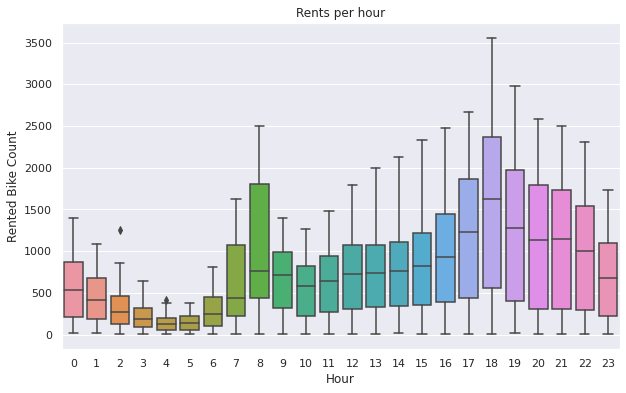

In [10]:
plt.figure(figsize=(10,6))
plt.title('Rents per hour')
sns.boxplot(y=data['Rented Bike Count'],x=data['Hour']);

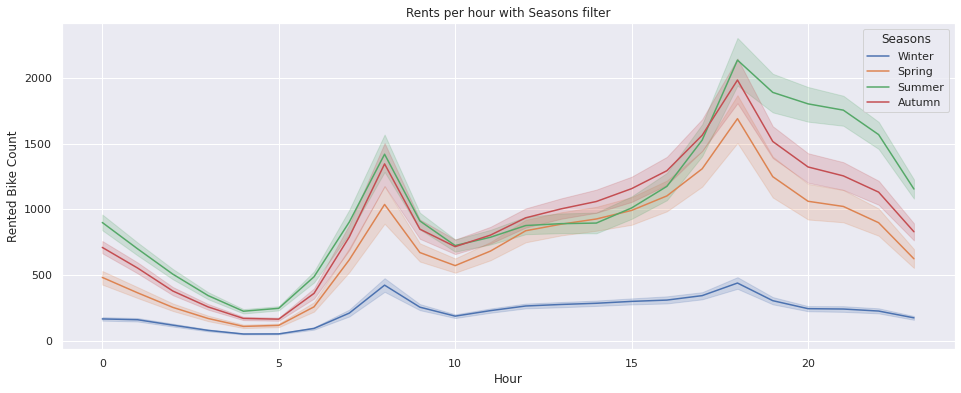

In [11]:
plt.figure(figsize=(16,6))
plt.title('Rents per hour with Seasons filter')
sns.lineplot(y=data['Rented Bike Count'],x=data['Hour'], hue=data['Seasons']);

Autumn and Spring have a similar amount of rent, Summer is the best season and Winter the worst

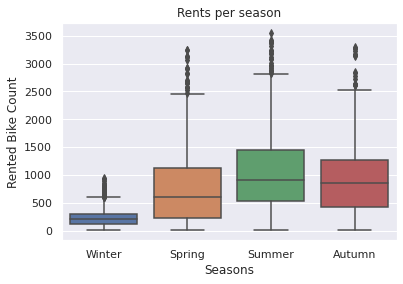

In [12]:
plt.title('Rents per season')
sns.boxplot(y=data['Rented Bike Count'],x=data['Seasons']);

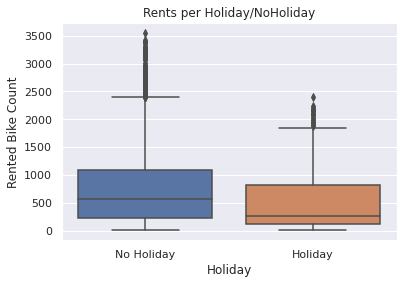

In [13]:
plt.title('Rents per Holiday/NoHoliday')
sns.boxplot(y=data['Rented Bike Count'],x=data['Holiday']);

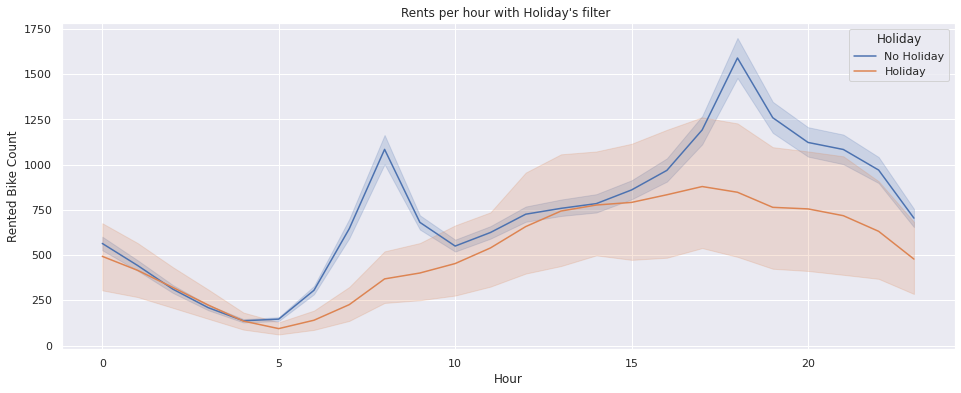

In [14]:
plt.figure(figsize=(16,6))
plt.title("Rents per hour with Holiday's filter ")
sns.lineplot(y=data['Rented Bike Count'],x=data['Hour'], hue=data['Holiday']);

Here we can see that the winter is very cold, Spring and Autumn have a similar temperature and Summer is Hot

It says to us that, in hotter days, there are more peopple looking for bikes

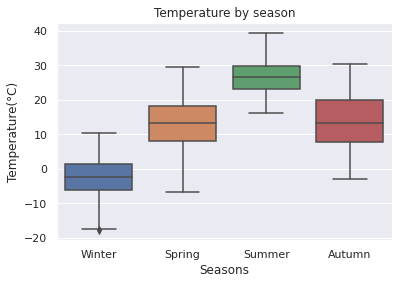

In [15]:
plt.title('Temperature by season')
sns.boxplot(y=data['Temperature(°C)'],x=data['Seasons']);

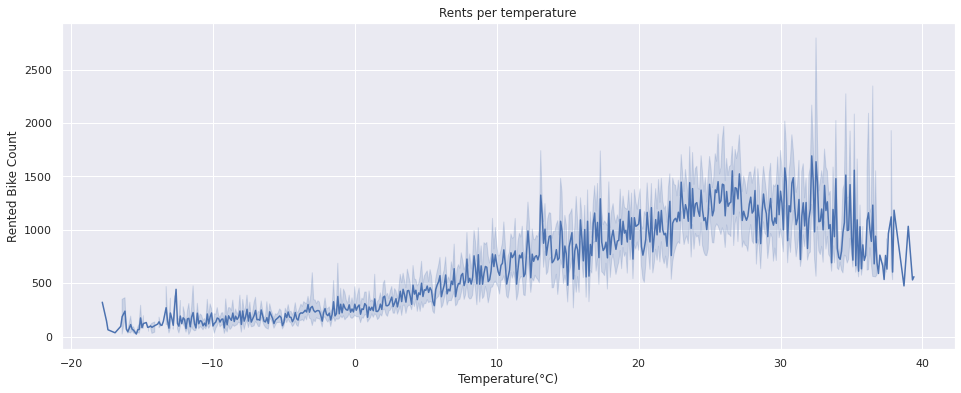

In [16]:
plt.figure(figsize=(16,6))
plt.title('Rents per temperature')
sns.lineplot(y=data['Rented Bike Count'],x=data['Temperature(°C)']);

Rain, Snow and high umidy are bad to the business as we can see next

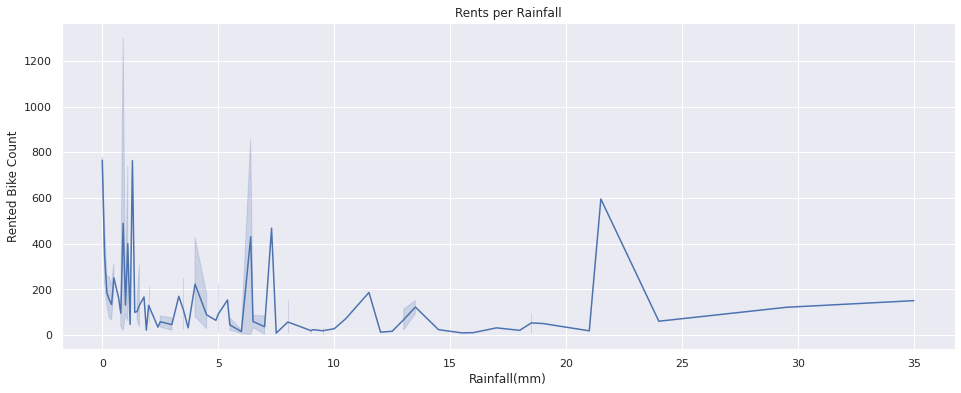

In [17]:
plt.figure(figsize=(16,6))
plt.title('Rents per Rainfall')
sns.lineplot(y=data['Rented Bike Count'],x=data['Rainfall(mm)']);

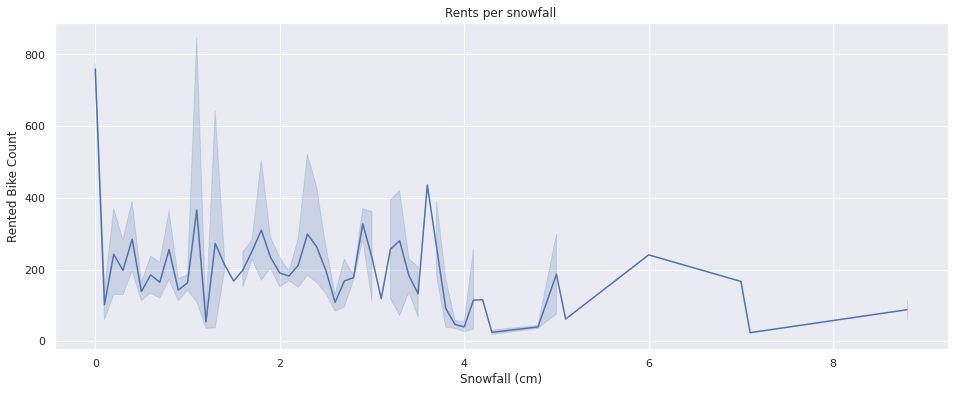

In [18]:
plt.figure(figsize=(16,6))
plt.title('Rents per snowfall')
sns.lineplot(y=data['Rented Bike Count'],x=data['Snowfall (cm)']);

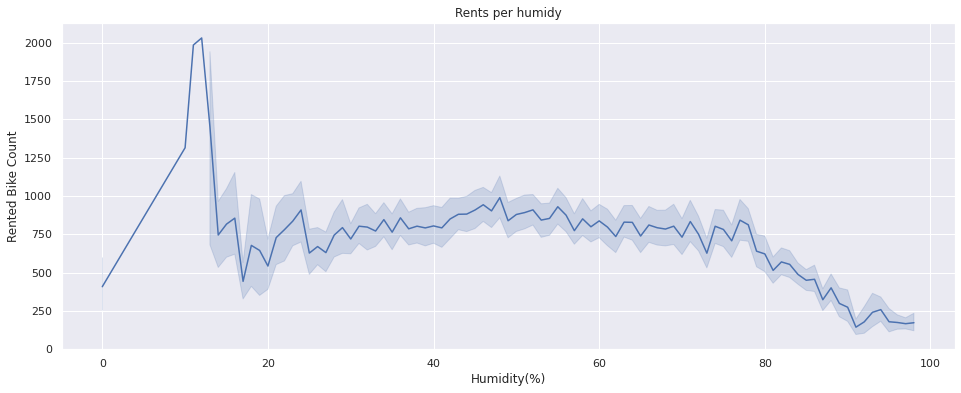

In [19]:
plt.figure(figsize=(16,6))
plt.title('Rents per humidy')
sns.lineplot(y=data['Rented Bike Count'],x=data['Humidity(%)']);

In [20]:
#Mean of rents with rain
rents_rain =sum(data[data['Rainfall(mm)'] != 0]['Rented Bike Count'])/len(data[data['Rainfall(mm)'] != 0])
#Mean of rents without rain
rents_norain = sum(data[data['Rainfall(mm)'] == 0]['Rented Bike Count'])/len(data[data['Rainfall(mm)'] == 0])

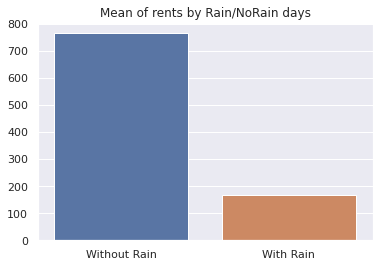

In [21]:
plt.title('Mean of rents by Rain/NoRain days')
sns.barplot(x=['Without Rain', 'With Rain'],y=[rents_norain,rents_rain]);

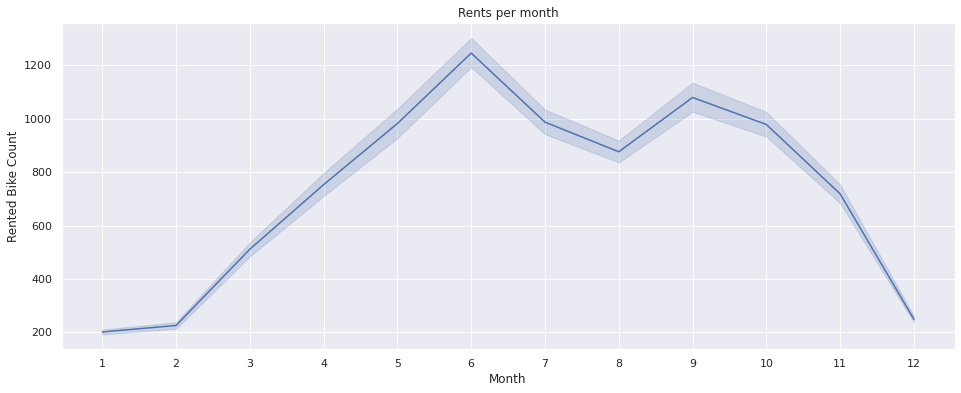

In [22]:
plt.figure(figsize=(16,6))
plt.title('Rents per month')
ax = plt.gca()
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
sns.lineplot(y=data['Rented Bike Count'],x=data['Month']);

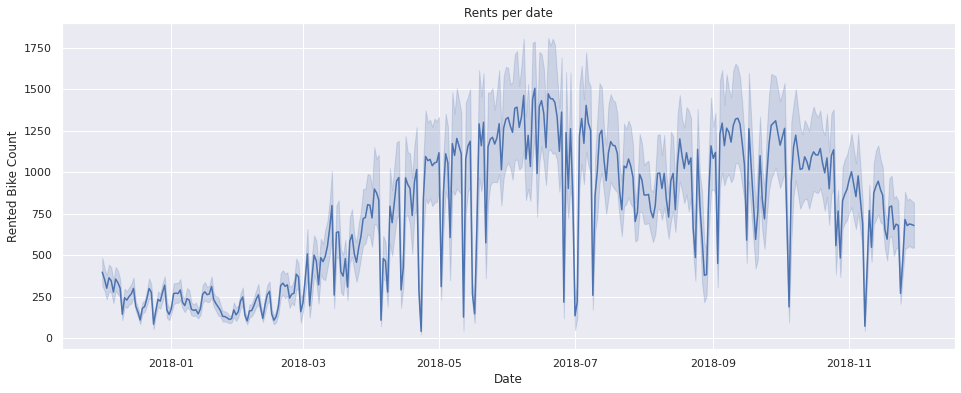

In [23]:
plt.figure(figsize=(16,6))
plt.title('Rents per date')
ax = plt.gca()
sns.lineplot(y=data['Rented Bike Count'],x=data['Date'], markers='OO');

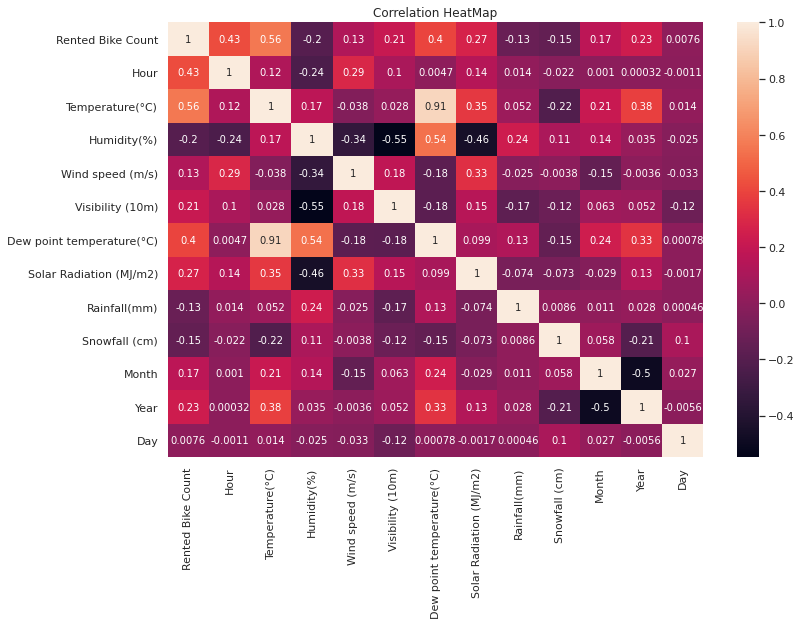

In [24]:
plt.figure(figsize=(12, 8))
plt.title('Correlation HeatMap')
sns.heatmap(data.corr(), annot=True);

# Preparations for Machine Learning model

In [25]:
def RMSLE(y_true, y_pred):
    """
        The Root Mean Squared Log Error (RMSLE) metric 
        
        :param y_true: The ground truth labels given in the dataset
        :param y_pred: Our predictions
        :return: The RMSLE score
    """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [26]:
data_cp = data.copy()

Converting some categorical str data to dummies

In [27]:
season_dummie = pd.get_dummies(data_cp['Seasons'])

In [28]:
data_cp = pd.concat([data_cp, season_dummie], axis=1)

In [29]:
data_cp['Holiday'] = pd.get_dummies(data_cp['Holiday'], drop_first=True)

In [30]:
data_cp.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Seasons,Holiday,Functioning Day,Month,Year,Day,Autumn,Spring,Summer,Winter
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,Winter,1,Yes,12,2017,1,0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,Winter,1,Yes,12,2017,1,0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,Winter,1,Yes,12,2017,1,0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,Winter,1,Yes,12,2017,1,0,0,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,Winter,1,Yes,12,2017,1,0,0,0,1


We will split the data by season, creating 4 new datasets
After that we will aply out_rem to remove outliers ,then concat all 4 seasons datasets withou ouliers in a new one

In [31]:
X_ver = data_cp[data_cp['Summer'] == 1]
X_inv = data_cp[data_cp['Winter'] == 1]
X_pri = data_cp[data_cp['Spring'] == 1]
X_out = data_cp[data_cp['Autumn'] == 1]

In [32]:
def out_rem(dataset, column):
    """Remove Ouliers"""
    max_tresh = dataset[column].quantile(0.95)
    min_tresh = dataset[column].quantile(0.05)
    df = dataset[(dataset[column] < max_tresh) & (dataset[column] > min_tresh)]
    return df

In [33]:
print(X_ver.shape) #with outliers

(2208, 21)


In [34]:
X_ver = out_rem(X_ver,'Rented Bike Count')
X_inv = out_rem(X_inv,'Rented Bike Count')
X_pri = out_rem(X_pri,'Rented Bike Count')
X_out = out_rem(X_out,'Rented Bike Count')

In [35]:
print(X_ver.shape) #without outliers

(1986, 21)


In [36]:
data_clean = pd.concat([X_ver, X_inv, X_pri, X_out], axis=0) #Concat the 4 cleaned data sets

The outliers are gone

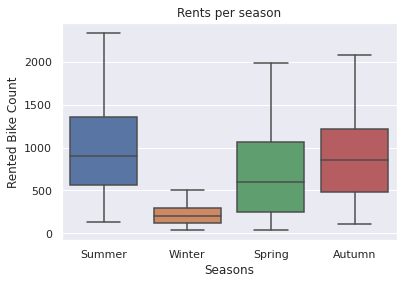

In [37]:
plt.title('Rents per season')
sns.boxplot(y=data_clean['Rented Bike Count'],x=data_clean['Seasons']);

In [38]:
rents_per_day = data_clean.groupby('Date').sum()['Rented Bike Count']
maximun = data_clean.groupby('Date')['Temperature(°C)'].max().rename('Max Temperature')
minimun = data_clean.groupby('Date')['Temperature(°C)'].min().rename('Min Temperature')

In [39]:
data_final = data_clean.groupby('Date').mean().drop(['Rented Bike Count', 'Hour', 'Temperature(°C)','Day','Year','Winter','Month','Dew point temperature(°C)'], axis=1)

In [40]:
data_final = pd.concat([data_final, maximun, minimun], axis=1)

To make a more usefull model we will work with days and not with hours
Max and min temperatures will be new features 

In [41]:
data_final

,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Max Temperature,Min Temperature
Date,,,,,,,,,,,,
2017-12-01,43.150000,1.555000,1844.900000,0.294000,0.000000,0.000000,1.0,0.0,0.0,0.0,3.0,-7.4
2017-12-02,67.157895,1.610526,1356.947368,0.168421,0.000000,0.000000,1.0,0.0,0.0,0.0,5.5,-4.4
2017-12-03,82.176471,1.600000,470.882353,0.090588,0.176471,0.000000,1.0,0.0,0.0,0.0,6.8,3.2
2017-12-04,55.631579,3.300000,1256.105263,0.335789,0.005263,0.000000,1.0,0.0,0.0,0.0,4.4,-5.8
2017-12-05,35.900000,1.250000,1951.350000,0.042500,0.000000,0.000000,1.0,0.0,0.0,0.0,-0.5,-7.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26,69.521739,1.026087,484.130435,0.436957,0.000000,0.113043,1.0,1.0,0.0,0.0,13.2,1.7
2018-11-27,67.130435,1.365217,411.173913,0.200870,0.000000,0.000000,1.0,1.0,0.0,0.0,12.5,3.5
2018-11-28,25.791667,1.695833,1429.083333,0.403333,0.000000,0.000000,1.0,1.0,0.0,0.0,10.5,2.1


# Model and evaluation

In [42]:
y_norm = np.log1p(rents_per_day) #writing values as ln(1+x) to make calculus easier

In [43]:
xgb = XGBRegressor(n_estimators=2100,learning_rate=0.03, n_jobs=4, random_state=19)

In [44]:
xgb_norm_pred = cross_val_predict(xgb,data_final, y_norm, cv=5)

In [45]:
#Real Values
print(np.mean(abs(np.exp(xgb_norm_pred)-1-rents_per_day)), ':Absolute mean error')
print(np.mean(abs(np.exp(xgb_norm_pred)-1-rents_per_day)/rents_per_day),':Relative mean error')
print(max(rents_per_day),',',max(np.exp(xgb_norm_pred)-1), ':real Max ,model max')
print(min(rents_per_day),',',min(np.exp(xgb_norm_pred)-1), ':real Mín ,model min')
print(RMSLE(rents_per_day,np.exp(xgb_norm_pred)-1), ':RMSLE')

3073.3851899317237 :Absolute mean error
0.2681740449664558 :Relative mean error
31949 , 25957.742 :real Max ,model max
810 , 1898.8441 :real Mín ,model min
0.3522551527482774 :RMSLE


# Conclusion

Rain, snow and hollidays are bad to the business

Summer is the best season for renting bikes

The best hour is at 18 (6Pm) except on Winter wich 8 AM is the best hour

A good way to maximize the profit is to repair bikes on rainning days, hollidays or at Winter season and be prepared at summer